# K-Means Clustering with scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
df = pd.read_csv('docs_vector_final.csv',  index_col = 0, header=None)

In [3]:
X = df.values

In [4]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [5]:
y_km = km.fit_predict(X)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
print('Variation Ratio cumsum: ', pca.explained_variance_ratio_.cumsum())
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.set_index(df.index,inplace=True)
print('Data shape: ', principalDf.shape)

Variation Ratio cumsum:  [0.21336063 0.35335782]
Data shape:  (49058, 2)


In [7]:
np.random.seed(seed=100)
df1_ =principalDf.reset_index(drop=True)
random_samples = np.random.choice(df1_.shape[0], 5000, replace=False)
df1 = df1_.iloc[random_samples,]
df2 = pd.DataFrame(y_km)
data = pd.concat([df1,df2],axis=1)
data.columns = ['pc1','pc2','label']

(-0.05, 0.06)

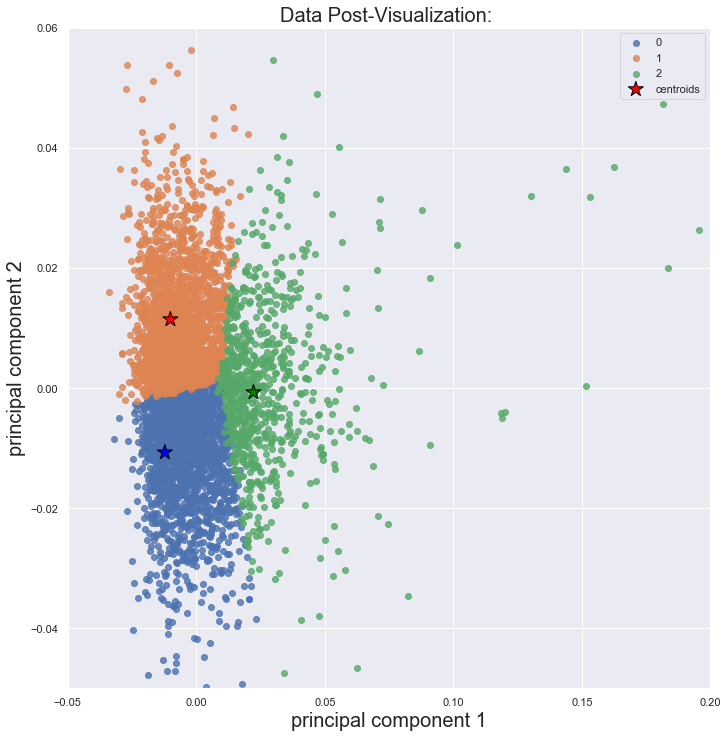

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
sns.lmplot(data=data, x='pc1', y='pc2', hue='label', 
                  fit_reg=False, legend=False, legend_out=True,height=10)
plt.scatter(
    pca.fit_transform(km.cluster_centers_)[:, 0], pca.fit_transform(km.cluster_centers_)[:, 1],
    s=250, marker='*',
    c=['red','blue','green'], edgecolor='black',
    label='centroids'
)
plt.legend()
plt.xlabel('principal component 1', fontsize = 20)
plt.ylabel('principal component 2', fontsize = 20)
plt.title('Data Post-Visualization: ', fontsize = 20)
plt.xlim([-0.05, 0.2])
plt.ylim([-0.05, 0.06])

## The Elbow Method: determine the optimal number of clusters 

In [9]:

# calculate SSE for a range of number of cluster
SSE = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=100
    )
    km.fit(X)
    SSE.append(km.inertia_)



ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

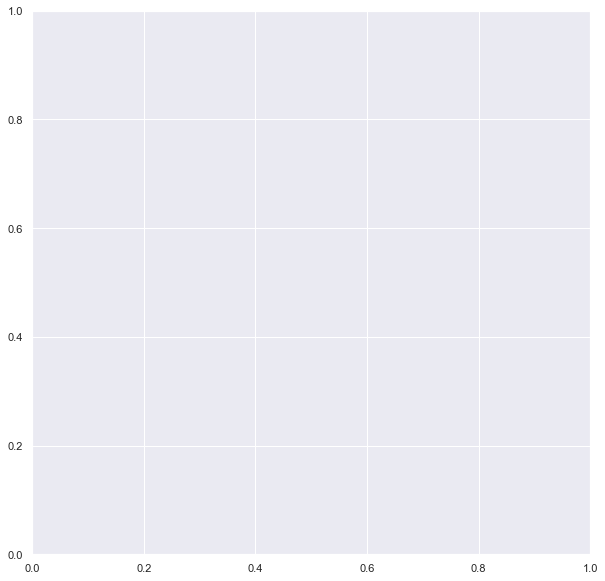

In [10]:
# plot
plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared Errors (SSE)')

The elbow is located at k = 3.